# **Author: Laaro Yussuf Olamilekan**
# **👨‍💻📊**
- Email: yusuflaaro@gmail.com
- Github: https://github.com/Laaroyussuf
- Linkedin: https://www.linkedin.com/in/yussuf-laaro-8b0808194
- Twitter: https://twitter.com/laaro_yussuf

## US AQI (Air Quality Index) record 1980-2022(May)
This is a US AQI dataset from (Jan)1980-(May)2022, It's made up of about 5.6 million rows and 15 columns. Check out the analysis below, to have more knowledge on the US air quality.

NB: For a non-technical person, keep scrolling down to check out the charts and deductions made. 

# Content
- ### *AQI*
- ### *Loading of data*
- ### *EDA (Exploratory Data Analysis)*
 - #### Pollutants
 - #### Air Status (Categorization based on AQI)
 - #### Time Analysis
 - #### Regional Analysis
- ### *CONCLUSION AND INSIGHTS FROM THE ANALYSIS*
- ### *REFRENCES*

## AQI (Air Quality Index)
An air quality index (AQI) is used by government agencies to communicate to the public how polluted the air currently is or how polluted it is forecast to become. AQI information is obtained by averaging readings from an air quality sensor, which can increase due to vehicle traffic, forest fires, or anything that can increase air pollution. Pollutants tested include ozone, nitrogen dioxide, sulphur dioxide, among others.

![title](https://th.bing.com/th/id/R.5f833e11981a30dc70fc20d0a2848442?rik=CD%2bXD63AGFAWPw&pid=ImgRaw&r=0/picture.png)

Public health risks increase as the AQI rises, especially affecting children, the elderly, and individuals with respiratory or cardiovascular issues. During these times, governmental bodies generally encourage people to reduce physical activity outdoors, or even avoid going out altogether. The use of face masks such as cloth masks may also be recommended.

#### **The table below defines the AQI categories:**
![title](https://d2v9ipibika81v.cloudfront.net/uploads/sites/190/AQI-Table.png)

**Picture credit:** https://kg.usembassy.gov/aqi-table/

## LOADING DATA...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('US_AQI.csv')

In [4]:
data.shape

(5617325, 15)

In [5]:
#Interested columns
columns_intr = [
    'Date',
    'AQI',
    'Category',
    'Defining Parameter',
    'state_name',
    'lat',
    'lng',
    'population',
    'timezone'
]

In [6]:
aqi = data[columns_intr]

In [ ]:
#aqi.info()

In [ ]:
#aqi.describe()

In [ ]:
#aqi.head()

In [ ]:
us_states = aqi.state_name.unique()

In [ ]:
pollutants = aqi['Defining Parameter'].unique()

# *EDA (Exploratory Data Analysis)*

## Pollutants

### Most common pollutant in US atmosphere within the time range (1980-2022);

In [7]:
com_poll = round(aqi['Defining Parameter'].value_counts(normalize = True, ascending=False) * 100, 2)

In [8]:
def remove_axis(axis_name):
    for a in ['right' , 'left', 'top', 'bottom']:
        axis_name.spines[a].set_visible(False)

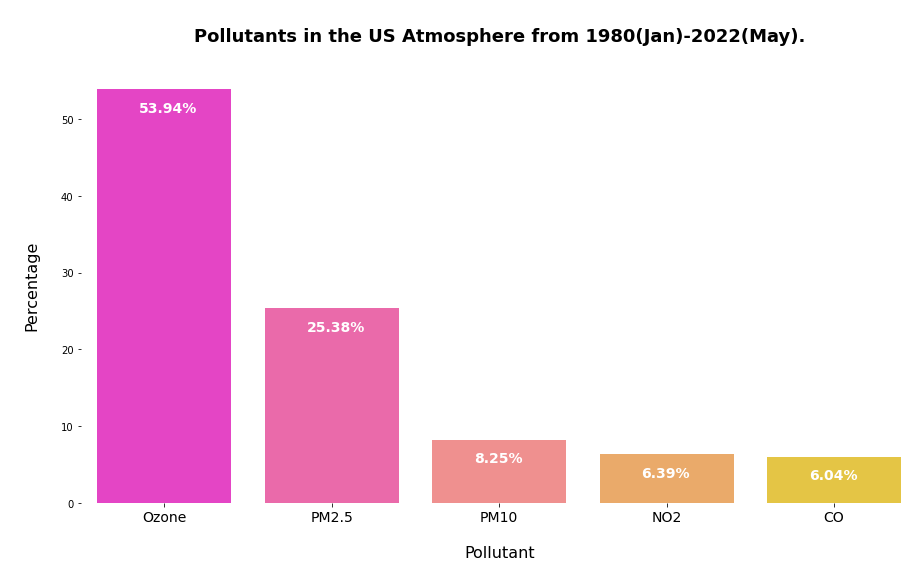

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=com_poll.index, y=com_poll,palette='spring')
for x in ax.patches:
    ax.text(x.get_x()+0.25, x.get_height()-3, str(x.get_height())+'%', weight='bold', color="white", fontsize=14)
remove_axis(axis_name=ax)
plt.title("\nPollutants in the US Atmosphere from 1980(Jan)-2022(May).\n", weight='bold', fontsize=18)
plt.xlabel('\nPollutant\n', fontsize=16)
plt.ylabel('\nPercentage\n', fontsize=16)
plt.xticks(fontsize=14);

# 📌
The above plot shows that, Ozone is the most common pollutant in the atmosphere (United State) followed by PM2.5 (Particulate matter of size 2.5).

### Comparing each pollutant in the atmosphere per year

In [10]:
time = pd.to_datetime(aqi.Date)
year = time.dt.year.to_frame()
poll_year = aqi[['Defining Parameter']].join(year)
poll_count = poll_year.groupby('Date')['Defining Parameter'].value_counts().rename('Count').reset_index()

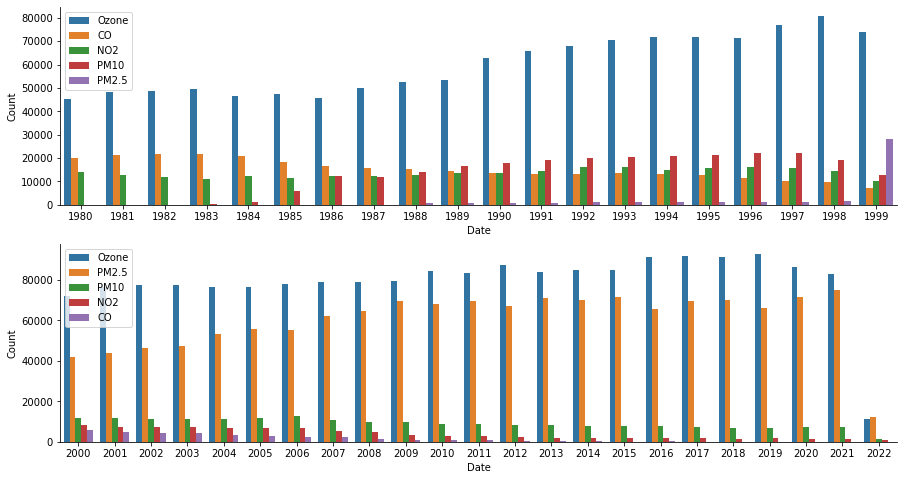

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
plt.subplot(2,1,1)
sns.barplot(y='Count', x='Date', hue='Defining Parameter', data=poll_count[poll_count.Date < 2000])
plt.legend(loc='upper left');
plt.subplot(2,1,2)
sns.barplot(y='Count', x='Date', hue='Defining Parameter', data=poll_count[poll_count.Date >=2000])
plt.legend(loc='upper left');
sns.despine();

# 📌
It is observed that from 1980-2021, the air is mostly polluted by Ozone (which can also be refer to as ground-level Ozone).
Ozone is a molecule made up of three oxygen atoms, often referenced as O3. Ozone is formed when heat and sunlight cause chemical reactions between oxides of nitrogen (NOX ) and Volatile Organic Compounds (VOC), which is also known as Hydrocarbons. This reaction can occur both near the ground and high in the atmosphere.

Ozone that formed at the stratosphere (higher region in the atmosphere) is known as Good Ozone while, the one formed closed to the ground is referred to as Bad Ozone.
The most significant things that cause ground-level ozone to form are:
- NOX and VOCs (from mobile source emissions and industrial processes )
- UV radiation (from sunlight).

Concentration of CO (Carbon mono-oxide) keeps decreasing through the years while, concentration of PM2.5 keeps increasing in the air.

From the year 2000, the concentration of NO2 in air start decreasing linearly.

Also, it is noted that, at the year 2022 (Jan-May) the air is mostly polluted with PM2.5 (Particulate matter of size 2.5) which can be said to have displaced Ozone from its position for the first time since 1980.

### Ozone formation with respect to each state in the US.

In [12]:
ozone_conc = aqi[aqi['Defining Parameter']=='Ozone'].groupby('state_name')\
['Defining Parameter'].value_counts().rename('Count').sort_values(ascending=False)
ozone_conc = ozone_conc.reset_index()

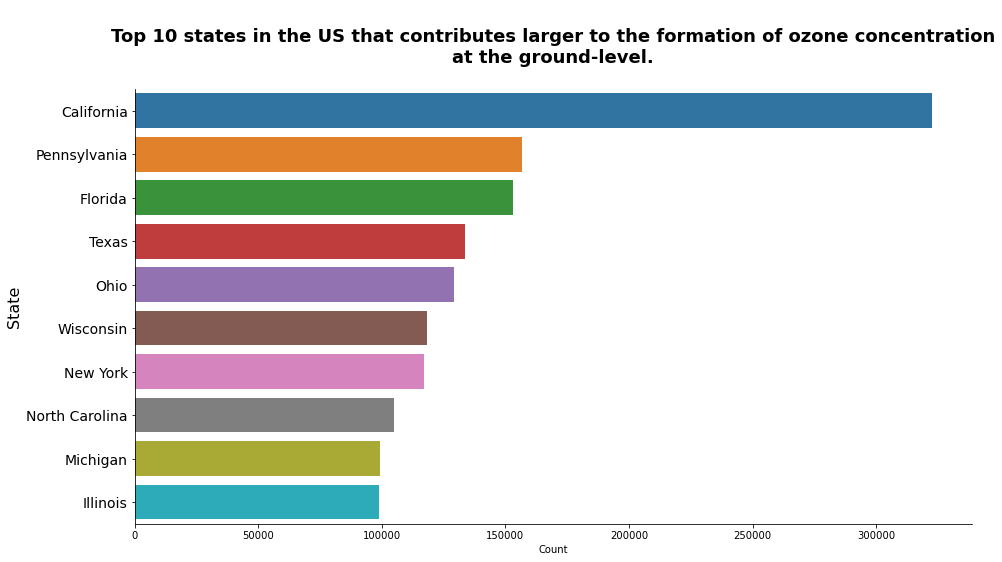

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Count', y='state_name',data=ozone_conc.head(10));
plt.title('\nTop 10 states in the US that contributes larger to the formation of ozone concentration\
\nat the ground-level.\n', 
          fontsize=18, weight='bold')
plt.ylabel('State', fontsize=16)
plt.yticks(fontsize=14)
sns.despine();

# 📌
California contributes the most to the high formation of ozone concentration in the ground-level through the time range (1980-2022).

### States that contribute the most to the formation of Nitrogen Oxide (NO2)

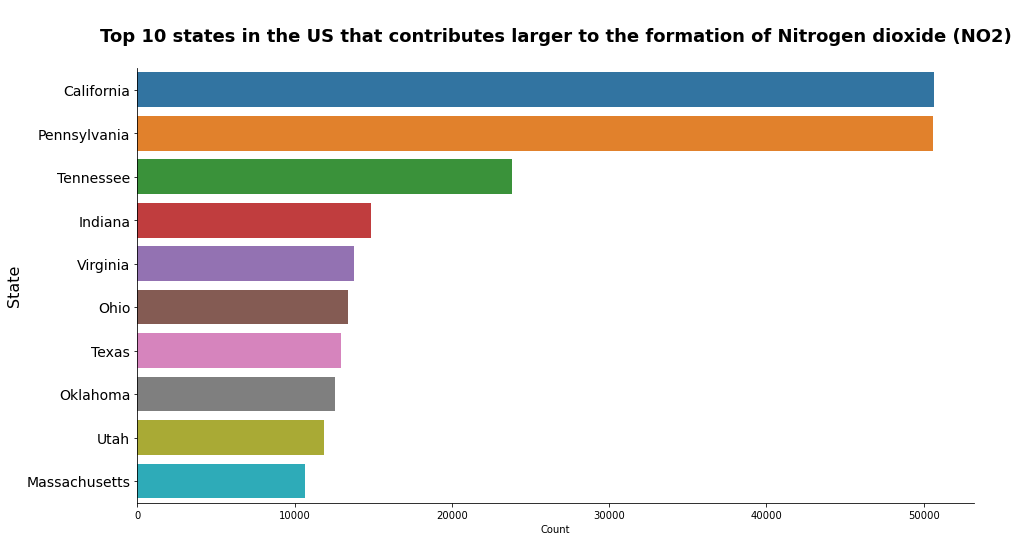

In [128]:
no2 = aqi[aqi['Defining Parameter']=='NO2'].groupby('state_name')\
['Defining Parameter'].value_counts().rename('Count').sort_values(ascending=False)
no2 = no2.reset_index()
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Count', y='state_name',data=no2.head(10));
plt.title('\nTop 10 states in the US that contributes larger to the formation of Nitrogen dioxide (NO2)\n', 
          fontsize=18, weight='bold')
plt.ylabel('State', fontsize=16)
plt.yticks(fontsize=14)
sns.despine();

# 📌
From the plot above, it can be seen that California top the list just like it does for Ozone (from the recent plot). This also tells us the relationship between NO2 and Ozone, Ozone is formed when heat and sunlight cause chemical reactions between oxides of nitrogen (NOX ) and Volatile Organic Compounds (VOC). Higher presence of NOX mostly resulted to higher concentration of Ozone.

### PM2.5 Formation

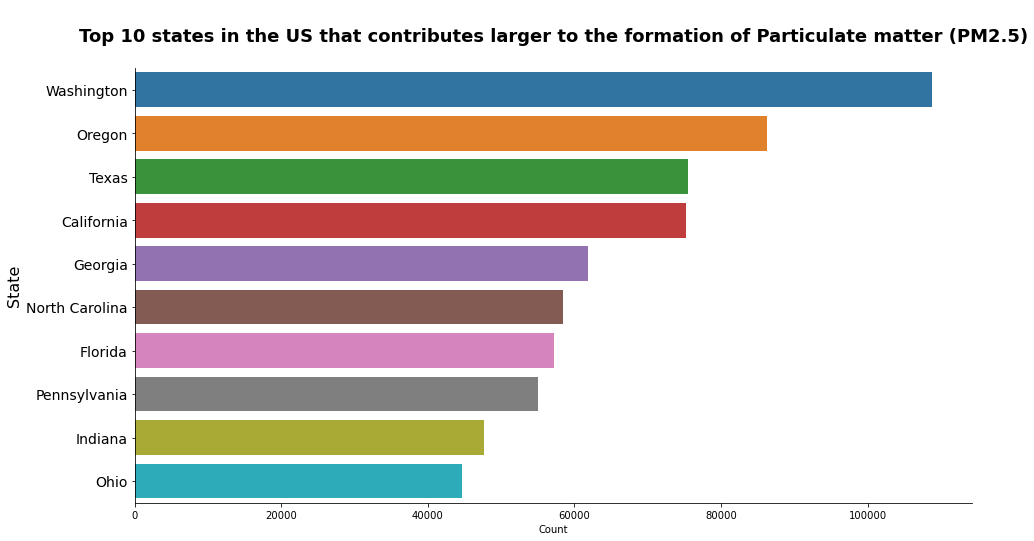

In [125]:
pm = aqi[aqi['Defining Parameter']=='PM2.5'].groupby('state_name')\
['Defining Parameter'].value_counts().rename('Count').sort_values(ascending=False)
pm = pm.reset_index()
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Count', y='state_name',data=pm.head(10));
plt.title('\nTop 10 states in the US that contributes larger to the formation of Particulate matter (PM2.5)\n', 
          fontsize=18, weight='bold')
plt.ylabel('State', fontsize=16)
plt.yticks(fontsize=14)
sns.despine();

# 📌
From the plot above, it could be derived that, there are more formation of PM2.5 in Washington within the time range. That is, the region contributes the most to the air pollution with higher concentration of PM2.5.

Also, California can be spotted among the top 5 contributor to the formation of PM2.5. This explained how much California contributes to US air pollution and its AQI value.

### State with the highest AQI value from 1980-2022

In [133]:
high_aqi = aqi.sort_values(by='AQI', ascending=False)
high_aqi.head(10)

,Date,AQI,Category,Defining Parameter,state_name,lat,lng,population,timezone
3276391,2001-05-02,20646,Hazardous,PM10,California,37.3665,-118.3958,3747.0,America/Los_Angeles
2981827,2003-02-02,16515,Hazardous,PM10,California,37.3665,-118.3958,3747.0,America/Los_Angeles
1710885,2011-12-01,13276,Hazardous,PM10,California,37.3665,-118.3958,3747.0,America/Los_Angeles
3276308,2001-02-08,12056,Hazardous,PM10,California,37.3665,-118.3958,3747.0,America/Los_Angeles
3276307,2001-02-07,10856,Hazardous,PM10,California,37.3665,-118.3958,3747.0,America/Los_Angeles
3420574,2000-10-22,10736,Hazardous,PM10,California,37.3665,-118.3958,3747.0,America/Los_Angeles
3420358,2000-03-20,10446,Hazardous,PM10,California,37.3665,-118.3958,3747.0,America/Los_Angeles
2522530,2006-02-15,8195,Hazardous,PM10,California,37.3665,-118.3958,3747.0,America/Los_Angeles
3130184,2002-03-01,7811,Hazardous,PM10,California,37.3665,-118.3958,3747.0,America/Los_Angeles
3130231,2002-04-17,6967,Hazardous,PM10,California,37.3665,-118.3958,3747.0,America/Los_Angeles


# 📌
California has the highest AQI value (i.e., extremely polluted and harmful for human health compare to other state) of 20646 (Hazardous) in May 2001 with higher concentration of PM10 (Particulate Matter of size 10).

### State with the Lowest AQI value from 1980-2022

In [17]:
low_aqi = aqi[['AQI','state_name']].join(poll_year)
low_aqi=low_aqi[low_aqi.AQI==0].sort_values(by='Date', ascending=True)
low_aqi.drop_duplicates().head()

,AQI,state_name,Defining Parameter,Date
5617013,0,California,Ozone,1980
5571048,0,Wisconsin,NO2,1980
5570009,0,Iowa,Ozone,1980
5567229,0,Maryland,CO,1980
5562938,0,Michigan,Ozone,1980


In [18]:
num_state=aqi.state_name.unique()
state_zero = low_aqi.state_name.unique()
state_not0 = []
for state in num_state:
    if not state in state_zero:
        state_not0.append(state)
print(f"These states are the only polluted one in 1980 {state_not0}")

These states are the only polluted one in 1980 ['Mississippi', 'Rhode Island', 'District of Columbia', 'Vermont']


# 📌
All of the states in the US have a very clean air with zero contamination/concentration in 1980 except for the following four states;
- Mississippi
- Rhode Island
- District of Columbia
- Vermont

Those states are the only polluted state atmospherically in 1980.

## Air Status (Category)

### Occurrence of each air status from 1980-2022

In [19]:
year = pd.to_datetime(aqi.Date).dt.year.to_frame()
year_df = year.join(aqi[['Category']])
year_cat = year_df.groupby('Date')['Category'].value_counts(normalize=True) * 100
year_cat= year_cat.rename('Count').reset_index()

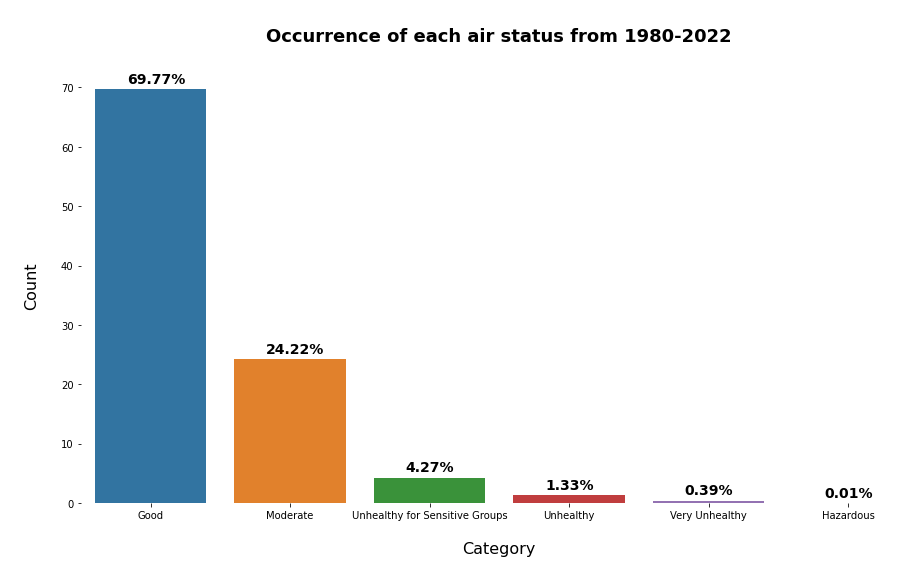

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Category', y ='Count',data=year_cat, ci=0);
for x in ax.patches:
    ax.text(x.get_x()+0.23, x.get_height()+1, str(round(x.get_height(),2))+'%', weight='bold', color="black", fontsize=14)
remove_axis(axis_name=ax)
plt.title('\nOccurrence of each air status from 1980-2022\n', 
          fontsize=18, weight='bold')
plt.ylabel('\nCount\n', fontsize=16)
plt.xlabel('\nCategory\n', fontsize=16);

## Time Analysis

### AQI trend from 1980 to 2022

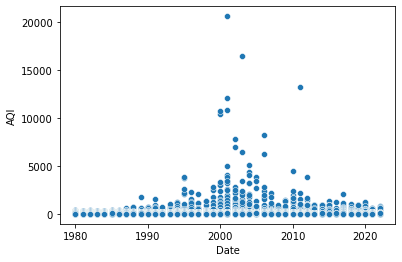

In [31]:
aqi_trend = year.join(aqi[['AQI']])
sns.scatterplot(x='Date', y='AQI', data=aqi_trend);

# 📌
The plot above explained how AQI value is increasing and decreasing. It can be seen above that, drastical increment started from around 1990 and getting more higher in the year 2000 but started decreasing from 2010.

### Timezone with their estimated AQI from 1980-2022

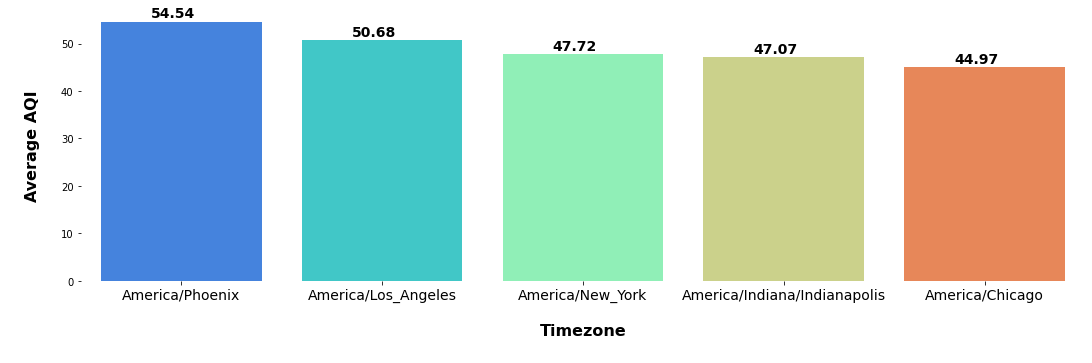

In [121]:
aqi_year = year.join(aqi[['AQI', 'state_name', 'timezone']])
avg_aqi = aqi_year.groupby('timezone')['AQI'].mean().sort_values(ascending=False).head()
fig, ax = plt.subplots(figsize=(18,5))
sns.barplot(x=avg_aqi.index, y=avg_aqi, palette='rainbow')
for x in ax.patches:
    ax.text(x.get_x()+0.25, x.get_height()+1, str(round(x.get_height(), 2)), weight='bold', fontsize=14, color='black')
plt.xlabel('\nTimezone\n', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.ylabel('\nAverage AQI\n', fontsize=16, weight='bold')
remove_axis(axis_name=ax);

# 📌
America/Phoenix timezone has the highest AQI (which is actually moderate) relatively.

## Regional Analysis

### Most Polluted state from 1980-2022 by average

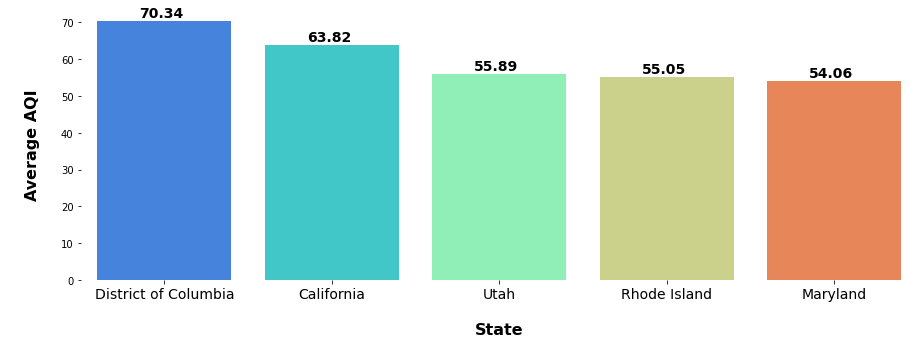

In [122]:
avg_aqi = aqi_year.groupby('state_name')['AQI'].mean().sort_values(ascending=False).head()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=avg_aqi.index, y=avg_aqi, palette='rainbow')
for x in ax.patches:
    ax.text(x.get_x()+0.25, x.get_height()+1, str(round(x.get_height(), 2)), weight='bold', fontsize=14, color='black')
plt.xlabel('\nState\n', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.ylabel('\nAverage AQI\n', fontsize=16, weight='bold')
remove_axis(axis_name=ax);

# 📌
By average, District of Columbia is said to be more polluted relatively (from (Jan)1980-(May)2022).

### Most Polluted state from Jan-May, 2022

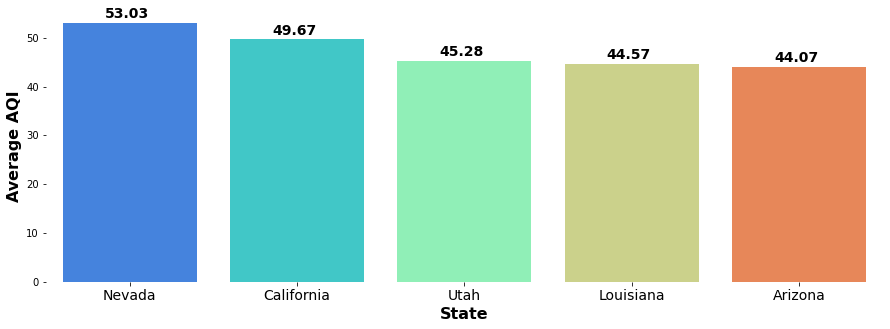

In [119]:
aqi_2022= aqi_year[aqi_year.Date==2022]
avg_aqi = aqi_2022.groupby('state_name')['AQI'].mean().sort_values(ascending=False).head()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=avg_aqi.index, y=avg_aqi, palette='rainbow')
for x in ax.patches:
    ax.text(x.get_x()+0.25, x.get_height()+1, str(round(x.get_height(), 2)), weight='bold', fontsize=14, color='black')
plt.xlabel('State', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.ylabel('Average AQI', fontsize=16, weight='bold')
remove_axis(axis_name=ax);

# 📌
By average, Nevada has the highest AQI from Jan-May, 2022 compare to other states with a value of 53.03 (Category/Air Status: Moderate). Relatively, Nevada is more polluted followed by California.

## CONCLUSION AND INSIGHTS FROM THE ANALYSIS

#### The following were deducted from the analysis;
- Ozone is the most common pollutant in the air till 2022.
- In the year 2022, PM2.5 is taking over as the common pollutant in air.
- Concentration of CO (Carbon mono-oxide) keeps decreasing through the years while, concentration of PM2.5 keeps increasing in the air.
- From the year 2000, the concentration of NO2 (Nitrogen dioxide) in air start decreasing linearly.
- California contributed the most to the formation of ground-level Ozone in the US.
- Washington contributed the most to the formation of PM2.5.
- California has the highest AQI value of 20646	since 1980 till date. That is, California is the state that has ever faced the worst air pollution in US.
- Mississippi, Rhode Island, District of Columbia, and Vermont are the only states in US that are polluted (to a smaller extent) atmospherically in 1980.
- 69.77% of the days (from 1980-2022) air quality  is Categorized as Good.
- Between 1990-2010, there's an increase in AQI values which denoted a detrimental air quality.
- America/Phoenix timezone has the highest average AQI (which is actually moderate) relatively.
- By average, District of Columbia has the lowest air quality relatively (from (Jan)1980-(May)2022), followed by California.
- In (Jan-May)2022, Nevada is the most polluted state (on average) relatively.

## RENFERENCES

Dataset: https://www.kaggle.com/datasets/calebreigada/us-air-quality-1980present

Definition: https://en.wikipedia.org/wiki/Air_quality_index

Picture credit:  https://kg.usembassy.gov/aqi-table/

# Thank you for reading through 🤝